In [7]:
import pandas as pd

data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
print(data.shape)
data.head(2)

(200, 4)


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4


In [5]:
data.tail(2)

,TV,radio,newspaper,sales
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


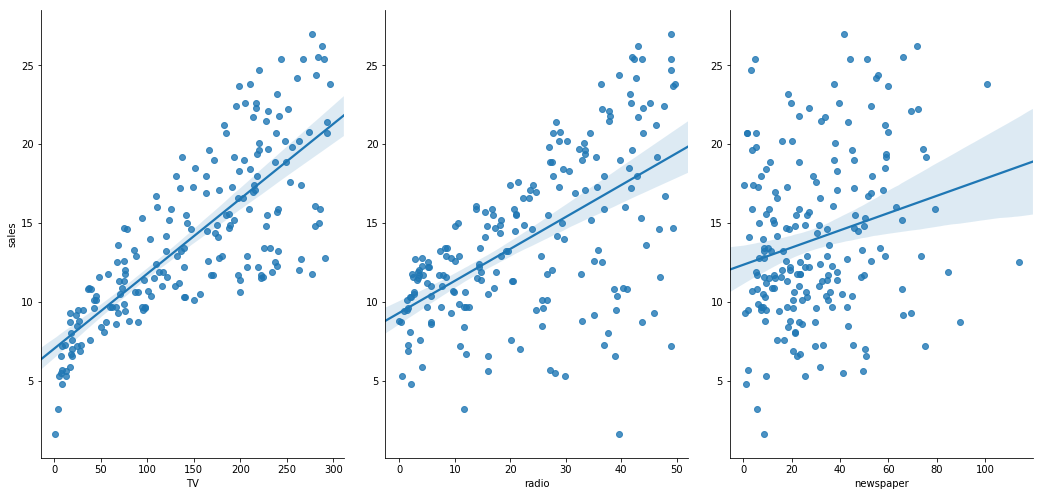

In [9]:
import seaborn as sns

%matplotlib inline
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

In [21]:
feature_cols = ['TV', 'radio', 'newspaper']

X = data[feature_cols]
print(X.shape)
y = data.iloc[:,-1]
print(y.shape)

(200, 3)
(200,)


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [25]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [29]:
list(zip(feature_cols, linreg.coef_))

[('TV', 0.046564567874150295),
 ('radio', 0.1791581224508883),
 ('newspaper', 0.0034504647111804065)]

In [30]:
y_pred = linreg.predict(X_test)

In [31]:
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

10.0


In [ ]:
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

In [32]:
print(metrics.mean_squared_error(true, pred))

150.0


In [35]:
import numpy as np
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.2474487139


* MAE is the easiest to understand, because it's the average error.
* MSE is more popular than MAE, because MSE "punishes" larger errors.
* RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

In [36]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.40465142303


In [40]:
feature_cols = ['TV', 'radio']
X = data[feature_cols]

y = data.sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.38790346994
